# Sun Country Airlines K mediods clustering with Gower distance 

### install pakcages

In [ ]:
import gower

### Load packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Clustering

### An additional way to handle mixed data: Gower Distance

A distance that automatically calculated the weighted average of continuous and categorical variables.

For each variable type, Gower will select a particular distance metric that works well for that type and scale it to fall between 0 and 1. Then, a linear combination using user-specified weights (most simply an average) is calculated to create the final distance matrix. 
The metrics used for each data type are described below:

In [ ]:
pip install scikit-learn-extra

You should consider upgrading via the '/Users/Shashank/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
top5_df_untouched = pd.read_csv("/Users/Shashank/Downloads/original_data_sample.csv")
top5_df_untouched.head()

,GenderCode,Age,TicketNum,BkdClassOfService,BookingChannel,UflyMemberStatus,BaseFareAmt
0,M,43.0,2,Coach,Outside Booking,Nonmember,683.0000
1,F,22.0,5,Coach,Outside Booking,Nonmember,315.9080
2,F,38.0,8,Coach,Outside Booking,Standard,278.2325
3,M,70.0,2,Coach,SCA Website Booking,Standard,181.3900
4,F,44.0,1,Coach,Outside Booking,Nonmember,248.3700


In [ ]:
print(top5_df_untouched.shape)

(7218, 7)


In [ ]:
top5_df_untouched.shape

(7218, 7)

### Load data 

In [ ]:
original_df = pd.read_csv("/Users/Shashank/Downloads/Team project/SunCountry.csv")
original_df.head()

,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,...,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode
0,AAABJK,3377365159634,2,JFK,MSP,2013-11-23,2013-12-13,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,...,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaN,244,SY,O
1,AAABJK,3377365159634,1,MSP,JFK,2013-11-23,2013-12-08,BRUMSA,4252554D4241434B44696420493F7C2067657420746869...,F,...,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaN,243,SY,NaN
2,AAABMK,3372107381942,2,MSP,SFO,2014-02-04,2014-02-23,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,...,293.96,338.0,NaN,NaN,NaN,NaN,NaN,397,SY,O
3,AAABMK,3372107381942,1,SFO,MSP,2014-02-04,2014-02-20,EILDRY,45494C4445525344696420493F7C206765742074686973...,M,...,293.96,338.0,NaN,NaN,NaN,NaN,NaN,392,SY,NaN
4,AAABTP,3372107470782,1,MCO,MSP,2014-03-13,2014-04-23,SKELMA,534B454C544F4E44696420493F7C206765742074686973...,F,...,112.56,132.0,NaN,NaN,NaN,NaN,NaN,342,SY,NaN


In [ ]:
top5_df = pd.read_csv("/Users/Shashank/Downloads/clustering_data_sample_final.csv")
top5_df.head()

,Unnamed: 0,Age,TicketNum,BaseFareAmt,GenderCode_M,BkdClassOfService_First Class,BookingChannel_Airport,BookingChannel_Outside Booking,BookingChannel_Reservations Booking,BookingChannel_SCA Website Booking,BookingChannel_SY Vacation,BookingChannel_Tour Operator Portal,UflyMemberStatus_Elite,UflyMemberStatus_Nonmember,UflyMemberStatus_Standard,cluster
0,610606,0.162243,-0.047404,2.377485,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
1,592924,-0.942987,1.815508,0.248706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,1363907,-0.100907,2.771073,0.030225,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,1202435,1.583253,-0.047404,-0.531368,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4,261505,0.214873,-1.456643,-0.142949,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2


In [ ]:
top5_df.drop('Unnamed: 0', axis = 1, inplace = True)
top5_df.shape

(7218, 15)

In [ ]:
# Calculate pairwise distance
gower_dist = gower.gower_matrix(top5_df)
# Print the shape of matrix
print("Shape of matrix:", gower_dist.shape)

Shape of matrix: (7218, 7218)


In [ ]:
# print(silhouette_score_list)

In [ ]:
top5_df.head(10)

,Age,TicketNum,BaseFareAmt,GenderCode_M,BkdClassOfService_First Class,BookingChannel_Airport,BookingChannel_Outside Booking,BookingChannel_Reservations Booking,BookingChannel_SCA Website Booking,BookingChannel_SY Vacation,BookingChannel_Tour Operator Portal,UflyMemberStatus_Elite,UflyMemberStatus_Nonmember,UflyMemberStatus_Standard,cluster
0,0.162243,-0.047404,2.377485,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
1,-0.942987,1.815508,0.248706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,-0.100907,2.771073,0.030225,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,1.583253,-0.047404,-0.531368,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4,0.214873,-1.456643,-0.142949,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
5,0.056983,-0.047404,-0.126770,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
6,0.214873,-0.047404,1.223477,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
7,1.635883,-0.047404,1.691169,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
8,-0.627207,-0.047404,0.757931,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
9,-0.521947,1.361834,-0.008121,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2


### DO NOT RUN the code block Below: Silhoutte Score
Takes too long to run, continue running from the next one after this

#### KMedoids 1. Hyperparameter (i.e., # of clusters) selection

(<Figure size 576x360 with 1 Axes>, <AxesSubplot:>)

Text(0.5, 1.0, 'Silhouette Score (K-medoids)')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Silhouette')

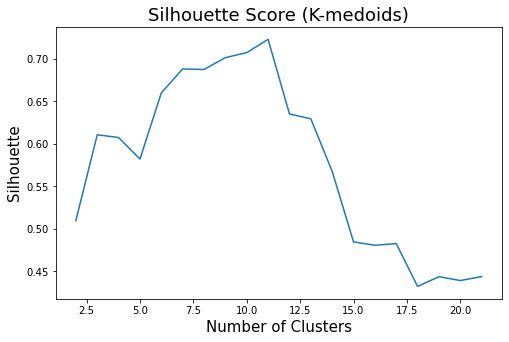

In [ ]:
silhouette_score_list =[]
for n_clusters in range(2, 25):
   
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMedoids(n_clusters = n_clusters, random_state = 10, method = 'pam') 
    cls_assignment = clusterer.fit_predict(gower_dist)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(gower_dist, cls_assignment)
    silhouette_score_list.append(silhouette_avg)

plt.subplots(figsize=(8,5))
plt.plot(range(2, 22), silhouette_score_list)
plt.title('Silhouette Score (K-medoids)', fontsize=18)
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('Silhouette', fontsize=15)
plt.show()

#### KMedoids 2. Choose the best number of clusters and finalize the clustering results
It appears that 3 and 10 are the optimal number of clusters. 7 could be tried out too.
We can try using both the number of clusters and try and see of any favourable outputs comes up.
Let's run the algorithm and select 3 as the number of clusters, and we can interpret the clusters by running summary on each cluster. 

# Fixing the number of Clusters as 3

In [ ]:
new_num_clusters = 3

# Fit model
clusterer = KMedoids(n_clusters = new_num_clusters, random_state = 10, method = 'pam') 
cls_assignment = clusterer.fit_predict(gower_dist)

# Add cluster column
top5_df['cluster'] = cls_assignment


In [ ]:
# Summary statistics by cluster
print('GenderCode_M')
top5_df.groupby('cluster')['GenderCode_M'].describe()

print('Age')
top5_df.groupby('cluster')['Age'].describe()

print('BaseFareAmt')
top5_df.groupby('cluster')['BaseFareAmt'].describe()

print('TicketNum')
top5_df.groupby('cluster')['TicketNum'].describe()

print('BkdClassOfService_First Class')
top5_df.groupby('cluster')['BkdClassOfService_First Class'].describe()

print('BookingChannel_Airport')
top5_df.groupby('cluster')['BookingChannel_Airport'].describe()

print('BookingChannel_Outside Booking')
top5_df.groupby('cluster')['BookingChannel_Outside Booking'].describe()

print('BookingChannel_SCA Website Booking')
top5_df.groupby('cluster')['BookingChannel_SCA Website Booking'].describe()

print('BookingChannel_SY Vacation')
top5_df.groupby('cluster')['BookingChannel_SY Vacation'].describe()

print('BookingChannel_Tour Operator Portal')
top5_df.groupby('cluster')['BookingChannel_Tour Operator Portal'].describe()

print('UflyMemberStatus_Elite')
top5_df.groupby('cluster')['UflyMemberStatus_Elite'].describe()

print('UflyMemberStatus_Nonmember')
top5_df.groupby('cluster')['UflyMemberStatus_Nonmember'].describe()

print('UflyMemberStatus_Standard')
top5_df.groupby('cluster')['UflyMemberStatus_Standard'].describe()


GenderCode_M


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2843.0,0.454098,0.497976,0.0,0.0,0.0,1.0,1.0
1,1180.0,0.554237,0.497260,0.0,0.0,1.0,1.0,1.0
2,3195.0,0.454147,0.497971,0.0,0.0,0.0,1.0,1.0


Age


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2843.0,-0.019706,1.040286,-2.048217,-0.837727,-0.048277,0.793803,3.109523
1,1180.0,0.288778,1.052140,-2.048217,-0.469317,0.425393,1.056953,3.109523
2,3195.0,-0.083801,0.924874,-2.048217,-0.785097,-0.206167,0.609598,2.741113


BaseFareAmt


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2843.0,-0.080826,1.079443,-1.583255,-0.688087,-0.191487,0.433156,23.596148
1,1180.0,0.098610,0.999768,-1.583255,-0.534007,-0.040422,0.505238,5.827910
2,3195.0,0.000046,0.956557,-1.583255,-0.633837,-0.083625,0.472039,5.914895


TicketNum


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2843.0,-0.093529,0.944845,-1.456643,-0.047404,-0.047404,-0.047404,4.633985
1,1180.0,0.452155,1.321455,-1.456643,-0.047404,-0.047404,1.361834,6.496898
2,3195.0,-0.114765,0.879079,-1.456643,-0.047404,-0.047404,-0.047404,5.004664


BkdClassOfService_First Class


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2843.0,0.020753,0.142581,0.0,0.0,0.0,0.0,1.0
1,1180.0,0.062712,0.242547,0.0,0.0,0.0,0.0,1.0
2,3195.0,0.005321,0.072761,0.0,0.0,0.0,0.0,1.0


BookingChannel_Airport


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2843.0,0.006683,0.081491,0.0,0.0,0.0,0.0,1.0
1,1180.0,0.005085,0.071156,0.0,0.0,0.0,0.0,1.0
2,3195.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


BookingChannel_Outside Booking


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2843.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1,1180.0,0.166102,0.37233,0.0,0.0,0.0,0.0,1.0
2,3195.0,1.000000,0.00000,1.0,1.0,1.0,1.0,1.0


BookingChannel_SCA Website Booking


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2843.0,0.751671,0.432120,0.0,1.0,1.0,1.0,1.0
1,1180.0,0.716949,0.450672,0.0,0.0,1.0,1.0,1.0
2,3195.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


BookingChannel_SY Vacation


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2843.0,0.045726,0.208928,0.0,0.0,0.0,0.0,1.0
1,1180.0,0.028814,0.167353,0.0,0.0,0.0,0.0,1.0
2,3195.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


BookingChannel_Tour Operator Portal


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2843.0,0.099191,0.298971,0.0,0.0,0.0,0.0,1.0
1,1180.0,0.015254,0.122614,0.0,0.0,0.0,0.0,1.0
2,3195.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


UflyMemberStatus_Elite


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2843.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1180.0,0.002542,0.050379,0.0,0.0,0.0,0.0,1.0
2,3195.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


UflyMemberStatus_Nonmember


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2843.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1,1180.0,0.010169,0.100372,0.0,0.0,0.0,0.0,1.0
2,3195.0,0.958998,0.198325,0.0,1.0,1.0,1.0,1.0


UflyMemberStatus_Standard


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2843.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1180.0,0.987288,0.112076,0.0,1.0,1.0,1.0,1.0
2,3195.0,0.041002,0.198325,0.0,0.0,0.0,0.0,1.0


# KMedoids 3. Interpreting the results
Based on these results
Cluster 3 has the highest number of data points with 3195 datapoints.
- Cluster 0: 
- Cluster 1: This cluster contains slighly older customers compared to all the other clusters
- Cluster 2: This cluster primarily comprises of males, is the most populated cluster,  

In [ ]:
top5_df.Age.describe()

count    7218.000000
mean        0.002354
std         1.001231
min        -2.048217
25%        -0.785097
50%        -0.048277
75%         0.793803
max         3.109523
Name: Age, dtype: float64

## PCA Analysis with three Clusters

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [ ]:
top5_df_PCA = top5_df.copy()

In [ ]:
top5_df_PCA.head()

,Age,TicketNum,BaseFareAmt,GenderCode_M,BkdClassOfService_First Class,BookingChannel_Airport,BookingChannel_Outside Booking,BookingChannel_Reservations Booking,BookingChannel_SCA Website Booking,BookingChannel_SY Vacation,BookingChannel_Tour Operator Portal,UflyMemberStatus_Elite,UflyMemberStatus_Nonmember,UflyMemberStatus_Standard,cluster
0,0.162243,-0.047404,2.377485,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
1,-0.942987,1.815508,0.248706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,-0.100907,2.771073,0.030225,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,1.583253,-0.047404,-0.531368,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,0.214873,-1.456643,-0.142949,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2


In [ ]:
top5_df_PCA.dtypes

Age                                    float64
TicketNum                              float64
BaseFareAmt                            float64
GenderCode_M                           float64
BkdClassOfService_First Class          float64
BookingChannel_Airport                 float64
BookingChannel_Outside Booking         float64
BookingChannel_Reservations Booking    float64
BookingChannel_SCA Website Booking     float64
BookingChannel_SY Vacation             float64
BookingChannel_Tour Operator Portal    float64
UflyMemberStatus_Elite                 float64
UflyMemberStatus_Nonmember             float64
UflyMemberStatus_Standard              float64
cluster                                  int64
dtype: object

In [ ]:
X_pca = top5_df_PCA.drop('cluster', axis=1)
pca = PCA().fit(X_pca)

In [ ]:
pca.explained_variance_ratio_*100

array([2.93028686e+01, 2.36907515e+01, 2.01922899e+01, 1.09986918e+01,
       6.04418899e+00, 5.64205579e+00, 1.99419165e+00, 9.79913592e-01,
       6.10111226e-01, 4.33301484e-01, 9.69664135e-02, 1.46689861e-02,
       2.71704225e-31, 1.00879305e-31])

The first principal component captures 295 variance, the second principal component captures 23% variance and similarly the third principal component captures 20 percent variance, the fourth principal component captures 10%. It makes no sense to go beyond past the four number to visualize the PC's. Let's start off by assuming the PC's to be 2

Text(0.5, 0, 'PCA components')

Text(0, 0.5, 'Explained Variance (proportion %)')

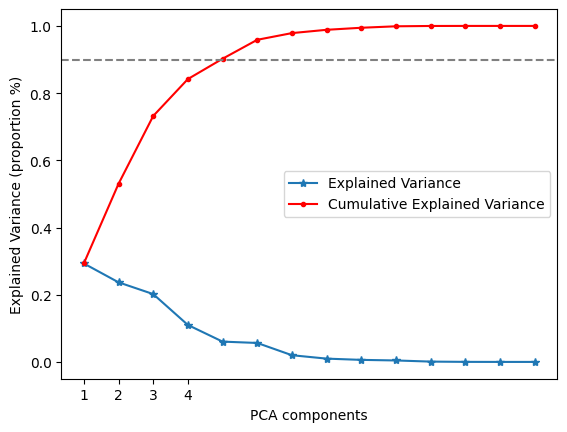

In [ ]:
exp_var = pca.explained_variance_ratio_ 
# cumulative sum of variance explained
exp_var_cumsum = np.cumsum(exp_var)


plt.plot(range(1, len(exp_var)+1),
        exp_var,'*-',label='Explained Variance')

plt.plot(range(1, len(exp_var)+1),
        exp_var_cumsum,'r.-',label='Cumulative Explained Variance')



plt.legend()
ax = plt.gca()
ax.set_xticks([1,2,3,4])
ax.set_xlabel('PCA components')
ax.set_ylabel('Explained Variance (proportion %)')

plt.axhline(0.9,linestyle='--',color='grey')


<Figure size 1200x800 with 0 Axes>

<AxesSubplot: xlabel='Component 1', ylabel='Component 2'>

Text(0.5, 0, 'PCA component 1')

Text(0, 0.5, 'PCA component 2')

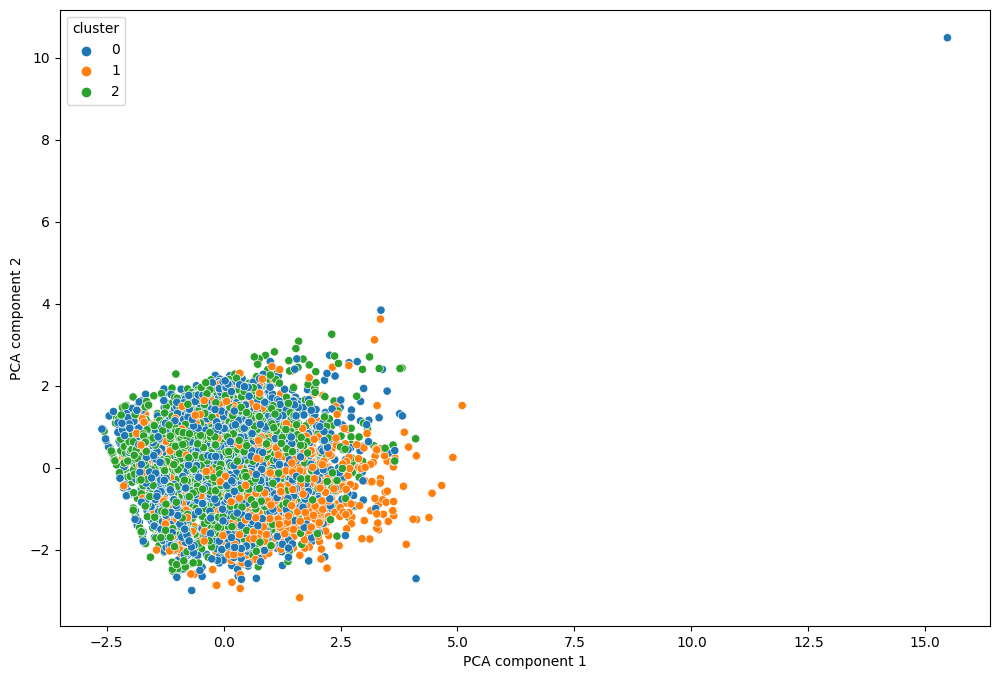

In [ ]:
## Next, we will project the data on two PCs and visualize them
# Exercise: Use scatterplot to show how different types of iris spread across the first and second principal component


pca = PCA(n_components=2)
components_2 = pca.fit_transform(X_pca)
components_2 = pd.DataFrame(components_2, columns=['Component 1', 'Component 2'])
components_2['cluster'] = top5_df_PCA['cluster']

plt.figure(figsize=(12,8))
sns.scatterplot(data=components_2, x='Component 1', y='Component 2', hue='cluster', palette=["C0", "C1", "C2"])
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')

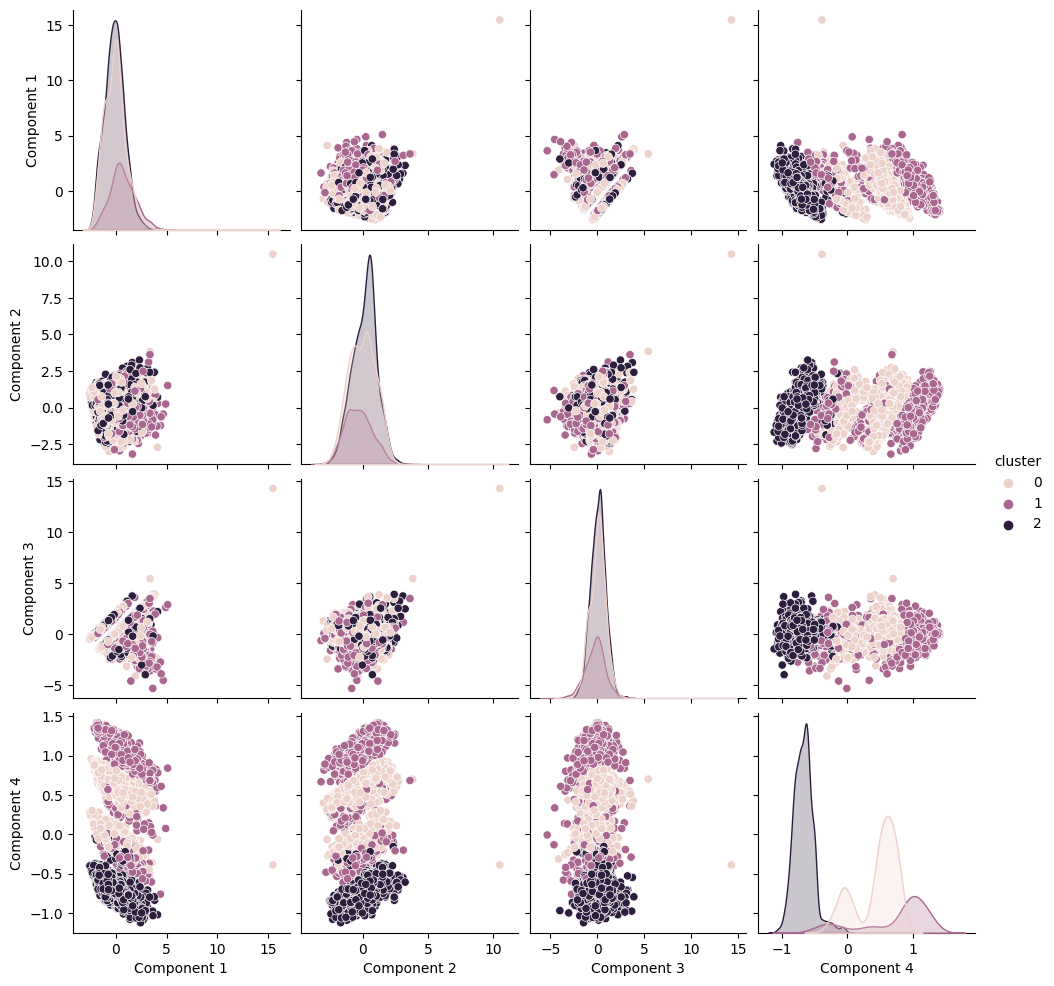

In [ ]:
# visualize how different y_iris spread out across each pair of principal components 



pca = PCA(n_components=4)
components = pca.fit_transform(X_pca)

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

comp_df = pd.DataFrame(components,columns=['Component 1','Component 2','Component 3','Component 4'])
comp_df['cluster']=top5_df_PCA['cluster']
sns.pairplot(comp_df,hue='cluster')

# Fixing the number of Clusters as 7

In [ ]:
latest_new_num_clusters = 7

# Fit model
clusterer = KMedoids(n_clusters = latest_new_num_clusters, random_state = 10, method = 'pam') 
cls_assignment = clusterer.fit_predict(gower_dist)

# Add cluster column
top5_df['clusters_7'] = cls_assignment



In [ ]:
# Summary statistics by cluster
print('GenderCode_M')
top5_df.groupby('clusters_7')['GenderCode_M'].describe()

print('Age')
top5_df.groupby('clusters_7')['Age'].describe()

print('BaseFareAmt')
top5_df.groupby('clusters_7')['BaseFareAmt'].describe()

print('TicketNum')
top5_df.groupby('clusters_7')['TicketNum'].describe()

print('BkdClassOfService')
top5_df.groupby('clusters_7')['BkdClassOfService_First Class'].describe()

print('BookingChannel_Airport')
top5_df.groupby('clusters_7')['BookingChannel_Airport'].describe()

print('BookingChannel_Outside Booking')
top5_df.groupby('clusters_7')['BookingChannel_Outside Booking'].describe()

print('BookingChannel_SCA Website Booking')
top5_df.groupby('clusters_7')['BookingChannel_SCA Website Booking'].describe()

print('BookingChannel_SY Vacation')
top5_df.groupby('clusters_7')['BookingChannel_SY Vacation'].describe()

print('BookingChannel_Tour Operator Portal')
top5_df.groupby('clusters_7')['BookingChannel_Tour Operator Portal'].describe()

print('UflyMemberStatus_Elite')
top5_df.groupby('clusters_7')['UflyMemberStatus_Elite'].describe()

print('UflyMemberStatus_Nonmember')
top5_df.groupby('clusters_7')['UflyMemberStatus_Nonmember'].describe()

print('UflyMemberStatus_Standard')
top5_df.groupby('clusters_7')['UflyMemberStatus_Standard'].describe()


GenderCode_M


,count,mean,std,min,25%,50%,75%,max
clusters_7,,,,,,,,
0,719.0,0.461752,0.498882,0.0,0.0,0.0,1.0,1.0
1,393.0,0.585242,0.493308,0.0,0.0,1.0,1.0,1.0
2,907.0,0.455347,0.498277,0.0,0.0,0.0,1.0,1.0
3,1165.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,1451.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
5,970.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
6,1613.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


Age


,count,mean,std,min,25%,50%,75%,max
clusters_7,,,,,,,,
0,719.0,-0.069675,0.988106,-2.048217,-0.890357,-0.003275,0.635913,2.530593
1,393.0,0.253709,1.019924,-1.995587,-0.416687,0.372763,1.004323,2.583223
2,907.0,0.271797,1.043873,-2.048217,-0.521947,0.425393,1.056953,3.109523
3,1165.0,0.029684,1.061666,-2.048217,-0.785097,0.004353,0.846433,3.109523
4,1451.0,-0.081320,0.918071,-2.048217,-0.732467,-0.153537,0.583283,2.372703
5,970.0,-0.038077,1.054786,-2.048217,-0.837727,-0.100907,0.793803,2.846373
6,1613.0,-0.098446,0.932964,-2.048217,-0.785097,-0.258797,0.583283,2.741113


BaseFareAmt


,count,mean,std,min,25%,50%,75%,max
clusters_7,,,,,,,,
0,719.0,-0.499314,1.435273,-1.583255,-1.583255,-0.612207,0.298024,23.596148
1,393.0,0.190329,1.031761,-1.583255,-0.407269,0.121429,0.677179,4.958055
2,907.0,0.051875,0.929424,-1.583255,-0.559223,-0.090816,0.442318,5.740924
3,1165.0,0.067012,0.874338,-1.583255,-0.531339,-0.083625,0.450408,5.445173
4,1451.0,0.027155,0.960570,-1.583255,-0.617658,-0.043843,0.490508,5.914895
5,970.0,0.064230,0.941614,-1.583255,-0.578841,-0.094411,0.466587,7.231276
6,1613.0,-0.034655,0.954428,-1.583255,-0.685594,-0.115983,0.445015,5.190016


TicketNum


,count,mean,std,min,25%,50%,75%,max
clusters_7,,,,,,,,
0,719.0,0.287155,1.065086,-1.456643,-0.047404,-0.047404,-0.047404,4.529701
1,393.0,0.474533,1.271403,-1.456643,-0.047404,-0.047404,1.361834,6.190259
2,907.0,0.410496,1.276849,-1.456643,-0.047404,-0.047404,1.361834,6.496898
3,1165.0,-0.184669,0.876582,-1.456643,-0.047404,-0.047404,-0.047404,4.633985
4,1451.0,-0.147504,0.913587,-1.456643,-0.047404,-0.047404,-0.047404,5.004664
5,970.0,-0.265475,0.859358,-1.456643,-1.456643,-0.047404,-0.047404,3.224747
6,1613.0,-0.110125,0.850878,-1.456643,-0.047404,-0.047404,-0.047404,3.418522


BkdClassOfService


,count,mean,std,min,25%,50%,75%,max
clusters_7,,,,,,,,
0,719.0,0.029207,0.168504,0.0,0.0,0.0,0.0,1.0
1,393.0,0.027990,0.165154,0.0,0.0,0.0,0.0,1.0
2,907.0,0.058434,0.234692,0.0,0.0,0.0,0.0,1.0
3,1165.0,0.014592,0.119965,0.0,0.0,0.0,0.0,1.0
4,1451.0,0.007581,0.086768,0.0,0.0,0.0,0.0,1.0
5,970.0,0.031959,0.175981,0.0,0.0,0.0,0.0,1.0
6,1613.0,0.003720,0.060895,0.0,0.0,0.0,0.0,1.0


BookingChannel_Airport


,count,mean,std,min,25%,50%,75%,max
clusters_7,,,,,,,,
0,719.0,0.027816,0.164561,0.0,0.0,0.0,0.0,1.0
1,393.0,0.010178,0.100500,0.0,0.0,0.0,0.0,1.0
2,907.0,0.001103,0.033204,0.0,0.0,0.0,0.0,1.0
3,1165.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,1451.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,970.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,1613.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


BookingChannel_Outside Booking


,count,mean,std,min,25%,50%,75%,max
clusters_7,,,,,,,,
0,719.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,393.0,0.832061,0.374289,0.0,1.0,1.0,1.0,1.0
2,907.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,1165.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,1451.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
5,970.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,1613.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


BookingChannel_SCA Website Booking


,count,mean,std,min,25%,50%,75%,max
clusters_7,,,,,,,,
0,719.0,0.009736,0.098257,0.0,0.0,0.0,0.0,1.0
1,393.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,907.0,0.927233,0.259898,0.0,1.0,1.0,1.0,1.0
3,1165.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
4,1451.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,970.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
6,1613.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


BookingChannel_SY Vacation


,count,mean,std,min,25%,50%,75%,max
clusters_7,,,,,,,,
0,719.0,0.180807,0.385126,0.0,0.0,0.0,0.0,1.0
1,393.0,0.040712,0.197875,0.0,0.0,0.0,0.0,1.0
2,907.0,0.019846,0.139547,0.0,0.0,0.0,0.0,1.0
3,1165.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,1451.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,970.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,1613.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


BookingChannel_Tour Operator Portal


,count,mean,std,min,25%,50%,75%,max
clusters_7,,,,,,,,
0,719.0,0.396384,0.489486,0.0,0.0,0.0,1.0,1.0
1,393.0,0.015267,0.122770,0.0,0.0,0.0,0.0,1.0
2,907.0,0.009923,0.099173,0.0,0.0,0.0,0.0,1.0
3,1165.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,1451.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,970.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,1613.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


UflyMemberStatus_Elite


,count,mean,std,min,25%,50%,75%,max
clusters_7,,,,,,,,
0,719.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,393.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,907.0,0.003308,0.057448,0.0,0.0,0.0,0.0,1.0
3,1165.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,1451.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,970.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,1613.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


UflyMemberStatus_Nonmember


,count,mean,std,min,25%,50%,75%,max
clusters_7,,,,,,,,
0,719.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1,393.0,0.002545,0.050443,0.0,0.0,0.0,0.0,1.0
2,907.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,1165.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
4,1451.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
5,970.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
6,1613.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


UflyMemberStatus_Standard


,count,mean,std,min,25%,50%,75%,max
clusters_7,,,,,,,,
0,719.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,393.0,0.997455,0.050443,0.0,1.0,1.0,1.0,1.0
2,907.0,0.996692,0.057448,0.0,1.0,1.0,1.0,1.0
3,1165.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,1451.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,970.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,1613.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


### PCA Analysis with Seven Clusters

In [ ]:
top5_df_7_clusters_PCA = top5_df.copy()
top5_df_7_clusters_PCA.head()

,Age,TicketNum,BaseFareAmt,GenderCode_M,BkdClassOfService_First Class,BookingChannel_Airport,BookingChannel_Outside Booking,BookingChannel_Reservations Booking,BookingChannel_SCA Website Booking,BookingChannel_SY Vacation,BookingChannel_Tour Operator Portal,UflyMemberStatus_Elite,UflyMemberStatus_Nonmember,UflyMemberStatus_Standard,cluster,clusters_7
0,0.162243,-0.047404,2.377485,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,4
1,-0.942987,1.815508,0.248706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,6
2,-0.100907,2.771073,0.030225,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
3,1.583253,-0.047404,-0.531368,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,2
4,0.214873,-1.456643,-0.142949,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,6


In [ ]:
# X_pca_7_clusters = top5_df_7_clusters_PCA.drop('cluster',axis=1)
X_pca_7_clusters = top5_df_7_clusters_PCA.drop(columns=['cluster', 'clusters_7'])


In [ ]:
X_pca_7_clusters.head()

,Age,TicketNum,BaseFareAmt,GenderCode_M,BkdClassOfService_First Class,BookingChannel_Airport,BookingChannel_Outside Booking,BookingChannel_Reservations Booking,BookingChannel_SCA Website Booking,BookingChannel_SY Vacation,BookingChannel_Tour Operator Portal,UflyMemberStatus_Elite,UflyMemberStatus_Nonmember,UflyMemberStatus_Standard
0,0.162243,-0.047404,2.377485,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.942987,1.815508,0.248706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.100907,2.771073,0.030225,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.583253,-0.047404,-0.531368,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.214873,-1.456643,-0.142949,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
pca_7_clusters = PCA().fit(X_pca_7_clusters)

In [ ]:
pca_7_clusters.explained_variance_ratio_*100

array([2.93028686e+01, 2.36907515e+01, 2.01922899e+01, 1.09986918e+01,
       6.04418899e+00, 5.64205579e+00, 1.99419165e+00, 9.79913592e-01,
       6.10111226e-01, 4.33301484e-01, 9.69664135e-02, 1.46689861e-02,
       2.71704225e-31, 1.00879305e-31])

Text(0.5, 0, 'PCA components')

Text(0, 0.5, 'Explained Variance (proportion %)')

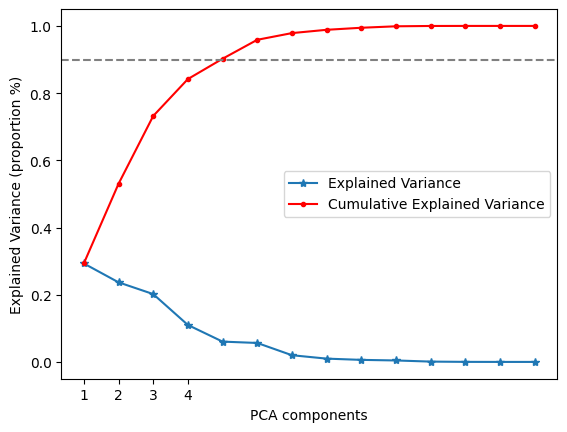

In [ ]:
exp_var = pca_7_clusters.explained_variance_ratio_ 
# cumulative sum of variance explained
exp_var_cumsum = np.cumsum(exp_var)


plt.plot(range(1, len(exp_var)+1),
        exp_var,'*-',label='Explained Variance')

plt.plot(range(1, len(exp_var)+1),
        exp_var_cumsum,'r.-',label='Cumulative Explained Variance')



plt.legend()
ax = plt.gca()
ax.set_xticks([1,2,3,4])
ax.set_xlabel('PCA components')
ax.set_ylabel('Explained Variance (proportion %)')

plt.axhline(0.9,linestyle='--',color='grey')


In [ ]:
components_2.shape

(7218, 3)

<Figure size 1200x800 with 0 Axes>

<AxesSubplot: xlabel='Component 1', ylabel='Component 2'>

Text(0.5, 0, 'PCA component 1')

Text(0, 0.5, 'PCA component 2')

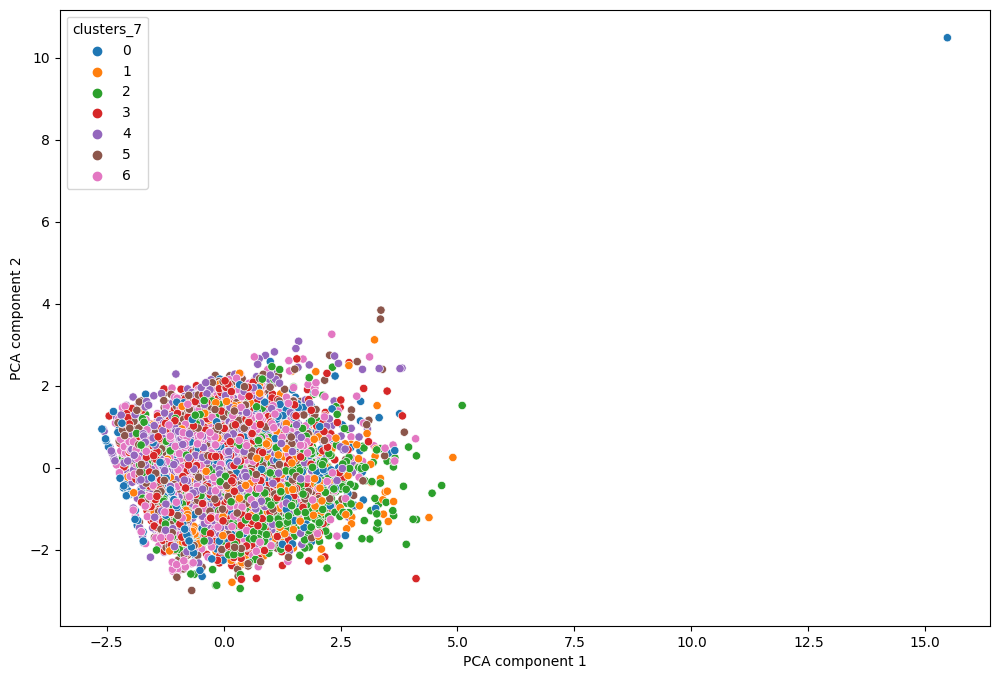

In [ ]:
## Next, we will project the data on two PCs and visualize them
# Exercise: Use scatterplot to show how different types of iris spread across the first and second principal component


pca_7_clusters = PCA(n_components=2)
components_2 = pca_7_clusters.fit_transform(X_pca_7_clusters)
components_2 = pd.DataFrame(components_2, columns=['Component 1', 'Component 2'])
components_2['clusters_7'] = top5_df_7_clusters_PCA['clusters_7']

plt.figure(figsize=(12,8))
sns.scatterplot(data=components_2, x='Component 1', y='Component 2', hue='clusters_7', palette=["C0", "C1", "C2","C3","C4","C5","C6"])
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')

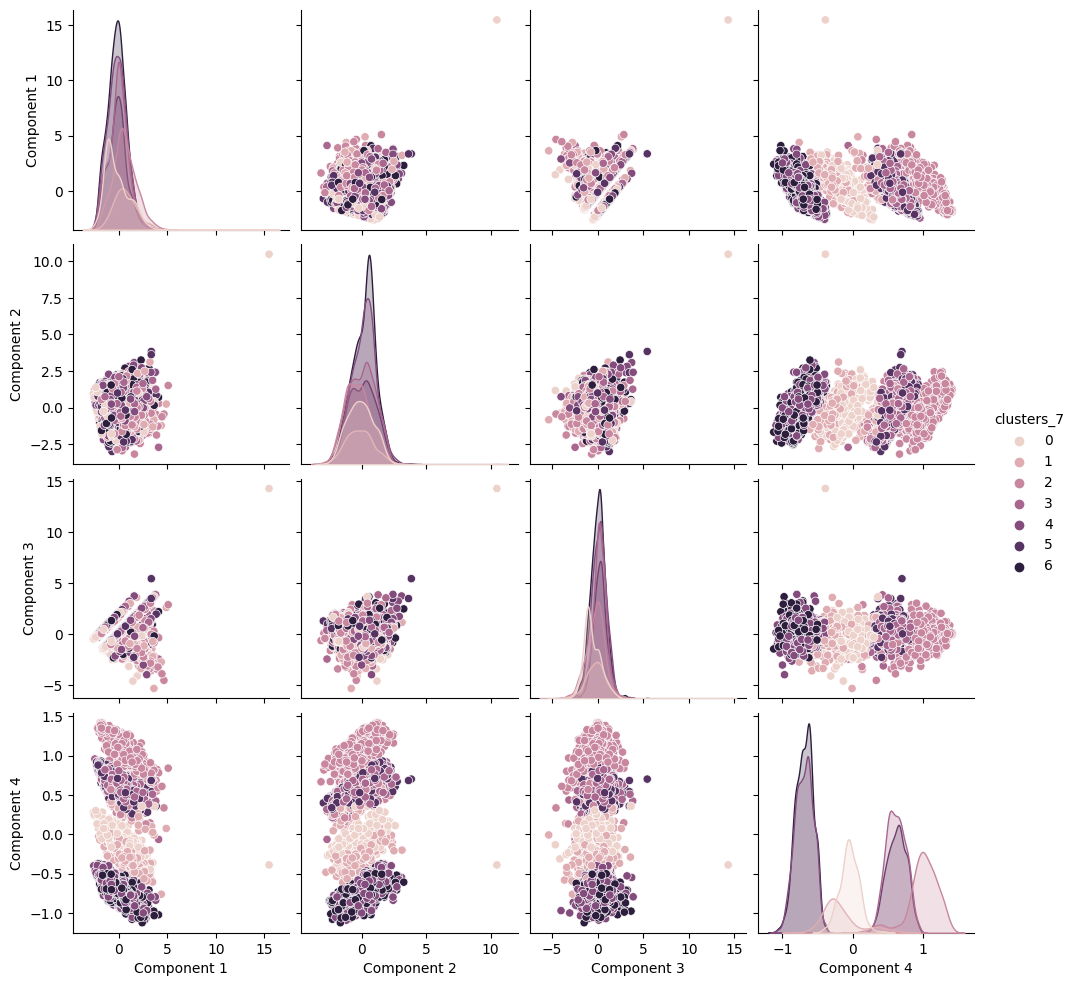

In [ ]:
# visualize how different y_iris spread out across each pair of principal components 



pca_7_clusters = PCA(n_components=4)
components = pca_7_clusters.fit_transform(X_pca_7_clusters)

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca_7_clusters.explained_variance_ratio_ * 100)
}

comp_df = pd.DataFrame(components,columns=['Component 1','Component 2','Component 3','Component 4'])
comp_df['clusters_7']=top5_df_7_clusters_PCA['clusters_7']
sns.pairplot(comp_df,hue='clusters_7')

## Column Appending

In [ ]:
extracted_col = top5_df["cluster"]

In [ ]:
top5_df_untouched = top5_df_untouched.join(extracted_col)
top5_df_untouched.head()

,GenderCode,Age,TicketNum,BkdClassOfService,BookingChannel,UflyMemberStatus,BaseFareAmt,cluster
0,M,43.0,2,Coach,Outside Booking,Nonmember,683.0000,2
1,F,22.0,5,Coach,Outside Booking,Nonmember,315.9080,2
2,F,38.0,8,Coach,Outside Booking,Standard,278.2325,1
3,M,70.0,2,Coach,SCA Website Booking,Standard,181.3900,1
4,F,44.0,1,Coach,Outside Booking,Nonmember,248.3700,2


In [ ]:
extracted_col_7 = top5_df["clusters_7"]
top5_df_untouched = top5_df_untouched.join(extracted_col_7)
top5_df_untouched.head()

,GenderCode,Age,TicketNum,BkdClassOfService,BookingChannel,UflyMemberStatus,BaseFareAmt,cluster,clusters_7
0,M,43.0,2,Coach,Outside Booking,Nonmember,683.0000,2,4
1,F,22.0,5,Coach,Outside Booking,Nonmember,315.9080,2,6
2,F,38.0,8,Coach,Outside Booking,Standard,278.2325,1,1
3,M,70.0,2,Coach,SCA Website Booking,Standard,181.3900,1,2
4,F,44.0,1,Coach,Outside Booking,Nonmember,248.3700,2,6


# Start Analysis using top5_df_untouched: 3 Clusters

We will be using only the 3 Cluster analysis results to give recommendations

## Univariate Analysis 

In [ ]:
top5_df_untouched.head()

,GenderCode,Age,TicketNum,BkdClassOfService,BookingChannel,UflyMemberStatus,BaseFareAmt,cluster,clusters_7
0,M,43.0,2,Coach,Outside Booking,Nonmember,683.0000,2,4
1,F,22.0,5,Coach,Outside Booking,Nonmember,315.9080,2,6
2,F,38.0,8,Coach,Outside Booking,Standard,278.2325,1,1
3,M,70.0,2,Coach,SCA Website Booking,Standard,181.3900,1,2
4,F,44.0,1,Coach,Outside Booking,Nonmember,248.3700,2,6


In [ ]:
print('BaseFareAmt')
top5_df_untouched.groupby('cluster')['BaseFareAmt'].describe()

BaseFareAmt


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2843.0,259.082683,186.141885,0.0,154.365,240.00,347.715,4342.0
1,1180.0,290.025093,172.402609,0.0,180.935,266.05,360.145,1278.0
2,3195.0,273.028351,164.951112,0.0,163.720,258.60,354.420,1293.0


## Booking Channel Analysis For Three Clusters

<Figure size 1000x1000 with 0 Axes>

<AxesSubplot: xlabel='cluster', ylabel='Age'>

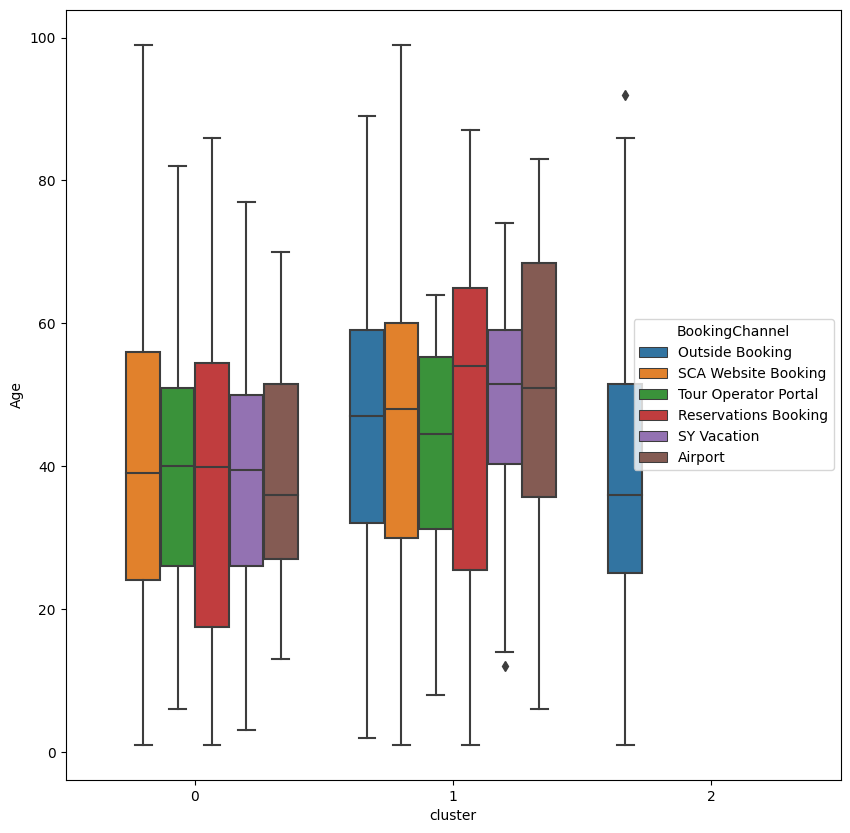

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="cluster", y="Age", data=top5_df_untouched, hue="BookingChannel")

<Figure size 800x800 with 0 Axes>

<AxesSubplot: xlabel='cluster', ylabel='Age'>

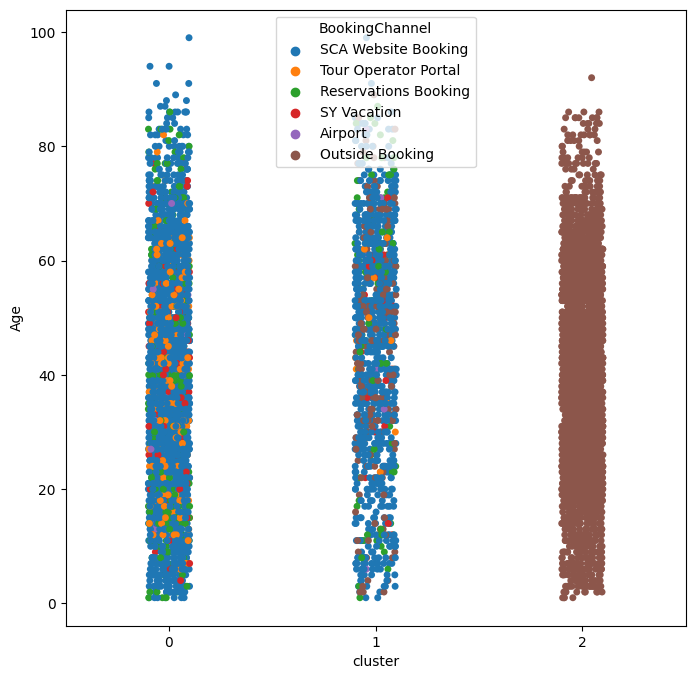

In [ ]:
plt.figure(figsize=(8, 8))
sns.stripplot(x="cluster", y="Age", data=top5_df_untouched, hue="BookingChannel")

<AxesSubplot: xlabel='Age', ylabel='Count'>

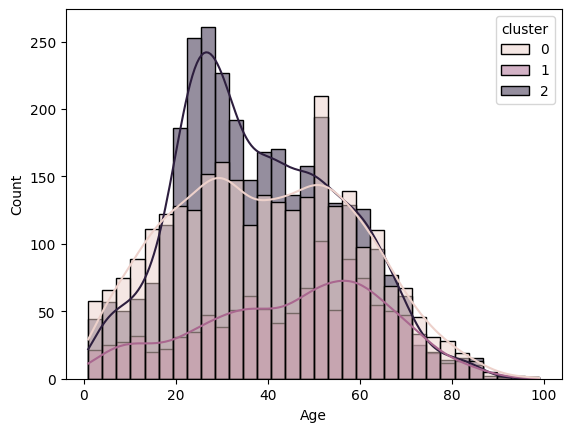

In [ ]:
# plt.figure(figsize=(8, 8))
sns.histplot(hue="cluster", x="Age", data=top5_df_untouched, kde = True)

<AxesSubplot: xlabel='Age', ylabel='Count'>

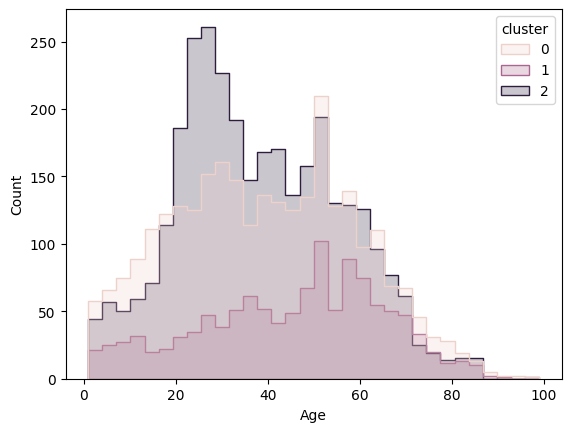

In [ ]:

# current_palette = sns.color_palette()
sns.histplot(data = top5_df_untouched, x="Age", hue="cluster", element="step")


In [ ]:
top5_df_untouched.groupby('cluster')['Age'].median()

cluster
0    39.0
1    48.0
2    36.0
Name: Age, dtype: float64

In [ ]:
top5_df_untouched.groupby('cluster')['Age'].mean()

cluster
0    39.542869
1    45.404237
2    38.325014
Name: Age, dtype: float64

In [ ]:
top5_df_untouched.groupby('cluster')['BookingChannel'].value_counts()

cluster  BookingChannel      
0        SCA Website Booking     2137
         Tour Operator Portal     282
         Reservations Booking     275
         SY Vacation              130
         Airport                   19
1        SCA Website Booking      846
         Outside Booking          196
         Reservations Booking      80
         SY Vacation               34
         Tour Operator Portal      18
         Airport                    6
2        Outside Booking         3195
Name: BookingChannel, dtype: int64

Insights from Booking Channels, cluster wise:
1) The cluster three includes customers primarily from outside booking channel  
2) The cluster two definitely is a mixed cluster, having customers from almost all the major booking channels.   
3) The reservations - booking channel has a really high median age compared to it's counterparts from other channels.    So it seems taht the slightly older people are more likely to go for the reservations booking channel compared to      the other ones, therefore could be used for targeted marketing.  
4) The third cluster has unusually high counts of people from 20 to 30, while the distribution of the second cluster      is a lot more smoother

In [ ]:
top5_df_untouched.head()

,GenderCode,Age,TicketNum,BkdClassOfService,BookingChannel,UflyMemberStatus,BaseFareAmt,cluster,clusters_7
0,M,43.0,2,Coach,Outside Booking,Nonmember,683.0000,2,4
1,F,22.0,5,Coach,Outside Booking,Nonmember,315.9080,2,6
2,F,38.0,8,Coach,Outside Booking,Standard,278.2325,1,1
3,M,70.0,2,Coach,SCA Website Booking,Standard,181.3900,1,2
4,F,44.0,1,Coach,Outside Booking,Nonmember,248.3700,2,6


<AxesSubplot: xlabel='TicketNum', ylabel='Count'>

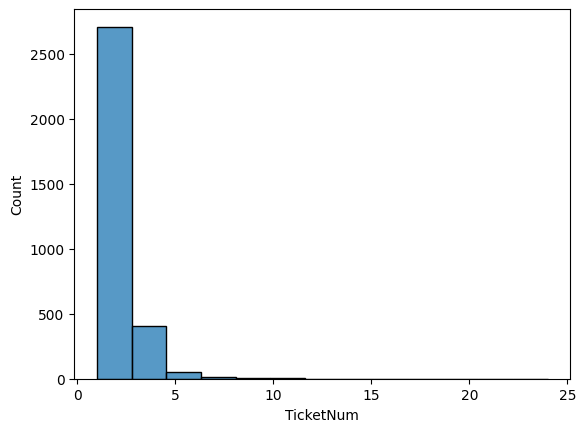

In [ ]:
sns.histplot(x="TicketNum", data=top5_df_untouched.loc[top5_df_untouched.cluster == 2])

<AxesSubplot: xlabel='TicketNum', ylabel='Count'>

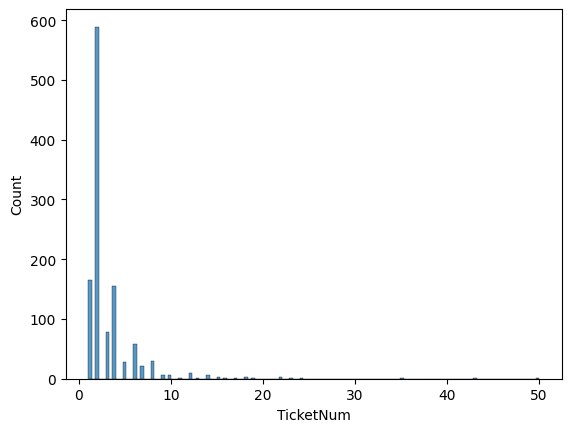

In [ ]:
sns.histplot(x="TicketNum", data=top5_df_untouched.loc[top5_df_untouched.cluster == 1])

<AxesSubplot: xlabel='TicketNum', ylabel='Count'>

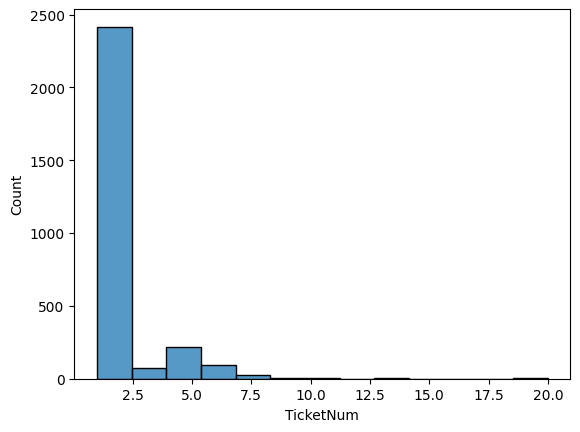

In [ ]:
sns.histplot(x="TicketNum", data=top5_df_untouched.loc[top5_df_untouched.cluster == 0])

## Gender Code Analysis For Three Clusters

<AxesSubplot:xlabel='cluster', ylabel='Age'>

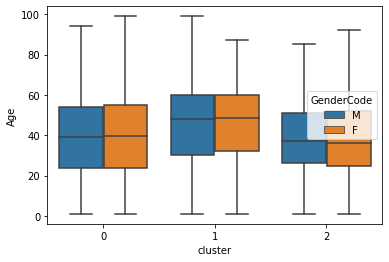

In [ ]:
sns.boxplot(x="cluster", y="Age", data=top5_df_untouched, hue="GenderCode")

<Figure size 576x576 with 0 Axes>

<AxesSubplot:xlabel='cluster', ylabel='count'>

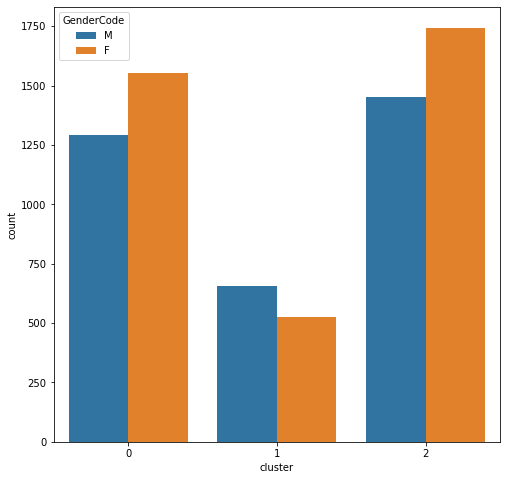

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(hue="GenderCode", x="cluster", data=top5_df_untouched)

## Booked Class Analysis For Three Clusters


<AxesSubplot:xlabel='cluster', ylabel='Age'>

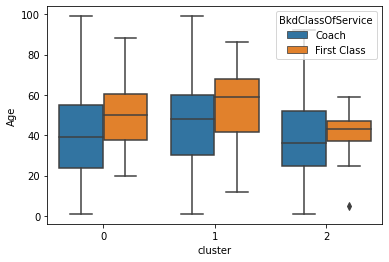

In [ ]:
sns.boxplot(x="cluster", y="Age", data=top5_df_untouched, hue="BkdClassOfService")

<AxesSubplot:xlabel='cluster', ylabel='count'>

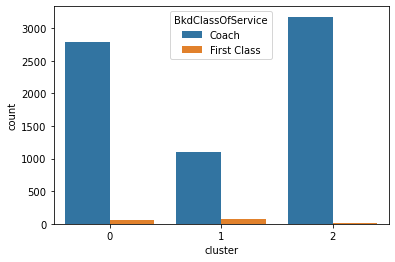

In [ ]:
sns.countplot(x="cluster", data=top5_df_untouched, hue="BkdClassOfService")

In [ ]:
top5_df_untouched.groupby('cluster')['BkdClassOfService'].value_counts()

cluster  BkdClassOfService
0        Coach                2784
         First Class            59
1        Coach                1106
         First Class            74
2        Coach                3178
         First Class            17
Name: BkdClassOfService, dtype: int64

<Figure size 576x576 with 0 Axes>

<AxesSubplot:xlabel='cluster', ylabel='Age'>

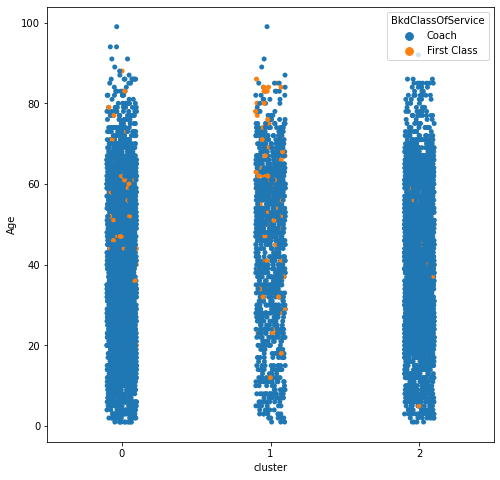

In [ ]:
plt.figure(figsize=(8, 8))
sns.stripplot(x="cluster", y="Age", data=top5_df_untouched, hue="BkdClassOfService")

## UflyMemberStatus Analysis for Three Clusters

In [ ]:
top5_df_untouched.groupby('cluster')['UflyMemberStatus'].value_counts()

cluster  UflyMemberStatus
0        Nonmember           2843
1        Standard            1165
         Nonmember             12
         Elite                  3
2        Nonmember           3064
         Standard             131
Name: UflyMemberStatus, dtype: int64

<Figure size 576x576 with 0 Axes>

<AxesSubplot:xlabel='cluster', ylabel='Age'>

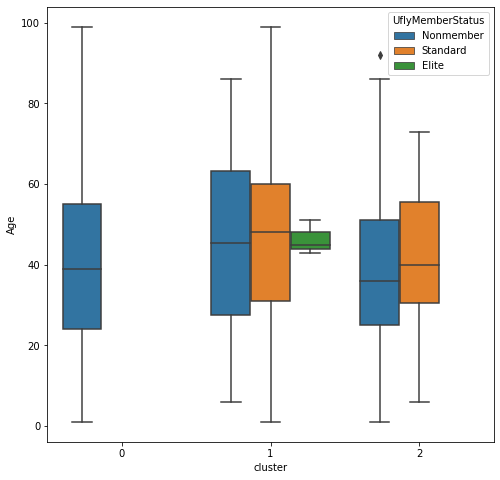

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="cluster", y="Age", data=top5_df_untouched, hue="UflyMemberStatus")

<Figure size 432x432 with 0 Axes>

<AxesSubplot:xlabel='cluster', ylabel='count'>

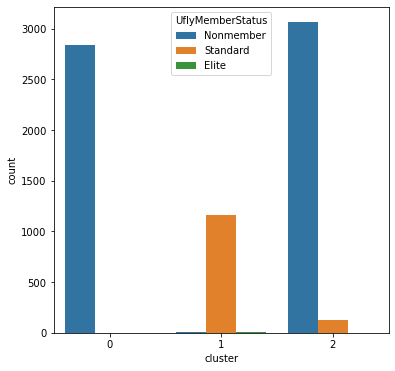

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x="cluster", data=top5_df_untouched, hue="UflyMemberStatus")

<Figure size 432x432 with 0 Axes>

<AxesSubplot:xlabel='cluster', ylabel='Age'>

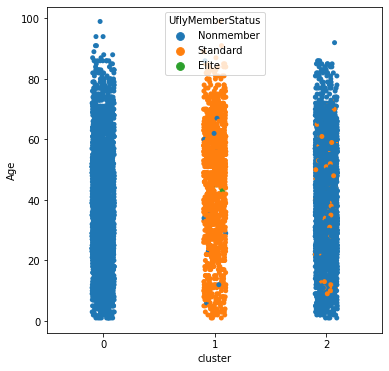

In [ ]:
plt.figure(figsize=(6, 6))
sns.stripplot(x="cluster", y="Age", data=top5_df_untouched, hue="UflyMemberStatus")

## BaseFareAmt Analysis For Three Clusters

In [ ]:
top5_df_untouched.groupby('cluster')['BaseFareAmt'].median()

cluster
0    240.00
1    266.05
2    258.60
Name: BaseFareAmt, dtype: float64

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='cluster', ylabel='BaseFareAmt'>

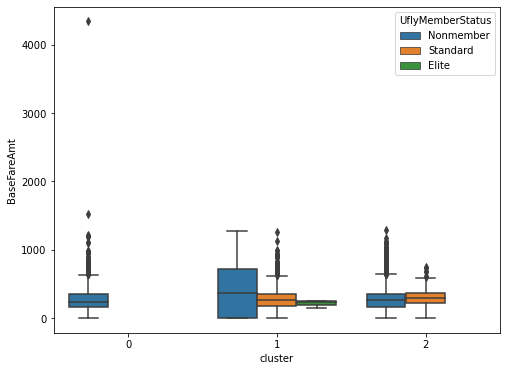

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="cluster", y="BaseFareAmt", data=top5_df_untouched, hue = 'UflyMemberStatus')

#### Outlier Detection and Analysis for the high Base Fare amount

In [ ]:
top5_df_untouched[top5_df_untouched['BaseFareAmt'] > 4000]

,GenderCode,Age,TicketNum,BkdClassOfService,BookingChannel,UflyMemberStatus,BaseFareAmt,cluster,clusters_7
380,F,17.0,3,Coach,Reservations Booking,Nonmember,4342.0,0,0


In [ ]:
outliers_df = original_df[original_df['BaseFareAmt'] > 4000]
outliers_df = outliers_df.groupby('EncryptedName').agg({'GenderCode':'last', 'Age':'max', 'TicketNum':'count',
                                          'BkdClassOfService': lambda x: pd.Series.mode(x)[0],
                                          'BookingChannel': lambda x: pd.Series.mode(x)[0],
                                          'UflyMemberStatus': 'max',
                                          'BaseFareAmt': 'mean'}).reset_index()
outliers_df.head()

,EncryptedName,GenderCode,Age,TicketNum,BkdClassOfService,BookingChannel,UflyMemberStatus,BaseFareAmt
0,414E44455253454E44696420493F7C2067657420746869...,None,NaN,2,Coach,Reservations Booking,NaN,4342.0
1,414E44455253454E44696420493F7C2067657420746869...,None,NaN,3,Coach,Reservations Booking,NaN,4342.0
2,414E44455253454E44696420493F7C2067657420746869...,None,NaN,3,Coach,Reservations Booking,NaN,4342.0
3,414E44455253454E44696420493F7C2067657420746869...,None,NaN,3,Coach,Reservations Booking,NaN,4342.0
4,4245454348455244696420493F7C206765742074686973...,None,NaN,3,Coach,Reservations Booking,NaN,4342.0


In [ ]:
outlier_names = outliers_df['EncryptedName']
outlier_original_df = original_df[original_df['EncryptedName'].isin(outlier_names)]
outlier_original_df

,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,...,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode
174948,NIRMEK,3372106686137,1,ZIH,MSP,2012-10-08,2013-03-24,ANDEAL,414E44455253454E44696420493F7C2067657420746869...,NaN,...,4342.0,440.0,NaN,NaN,NaN,GRP,NaN,530,SY,NaN
174949,NIRMEK,3372106686137,1,ZIH,MSP,2012-10-08,2013-03-24,ANDEAL,414E44455253454E44696420493F7C2067657420746869...,NaN,...,4342.0,440.0,NaN,NaN,NaN,GRP,NaN,530,SY,NaN
174950,NIRMEK,3372106686143,1,ZIH,MSP,2012-10-08,2013-03-24,BRYSBE,425259534F4E44696420493F7C20676574207468697320...,NaN,...,4342.0,440.0,NaN,NaN,NaN,GRP,NaN,530,SY,NaN
174951,NIRMEK,3372106686147,1,ZIH,MSP,2012-10-08,2013-03-24,CUNNBR,43554E4E494E4748414D44696420493F7C206765742074...,NaN,...,4342.0,440.0,NaN,NaN,NaN,GRP,NaN,530,SY,NaN
174952,NIRMEK,3372106686152,1,ZIH,MSP,2012-10-08,2013-03-24,FRITBY,46524954434844696420493F7C20676574207468697320...,NaN,...,4342.0,440.0,NaN,NaN,NaN,GRP,NaN,530,SY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426251,NIRMEK,3372106686185,1,ZIH,MSP,2012-10-08,2013-03-24,SHARLA,534841525044696420493F7C2067657420746869732072...,F,...,4342.0,440.0,NaN,NaN,NaN,GRP,NaN,530,SY,NaN
1426252,NIRMEK,3372106686185,1,ZIH,MSP,2012-10-08,2013-03-24,SHARLA,534841525044696420493F7C2067657420746869732072...,F,...,4342.0,440.0,NaN,NaN,NaN,GRP,NaN,530,SY,NaN
1426253,NIRMEK,3372106686185,1,ZIH,MSP,2012-10-08,2013-03-24,SHARLA,534841525044696420493F7C2067657420746869732072...,F,...,4342.0,440.0,NaN,NaN,NaN,GRP,NaN,530,SY,NaN
1426254,NIRMEK,3372106686186,1,ZIH,MSP,2012-10-08,2013-03-24,STULMI,5354554C4C44696420493F7C2067657420746869732072...,M,...,4342.0,440.0,NaN,NaN,NaN,GRP,NaN,530,SY,NaN


In [ ]:
flight_530 = original_df[(original_df['ServiceStartDate'] == '2013-03-24') & (original_df['MarketingFlightNbr'] == 530)]
flight_530[flight_530['BaseFareAmt'] > 4000]

,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,...,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode
174948,NIRMEK,3372106686137,1,ZIH,MSP,2012-10-08,2013-03-24,ANDEAL,414E44455253454E44696420493F7C2067657420746869...,NaN,...,4342.0,440.0,NaN,NaN,NaN,GRP,NaN,530,SY,NaN
174949,NIRMEK,3372106686137,1,ZIH,MSP,2012-10-08,2013-03-24,ANDEAL,414E44455253454E44696420493F7C2067657420746869...,NaN,...,4342.0,440.0,NaN,NaN,NaN,GRP,NaN,530,SY,NaN
174950,NIRMEK,3372106686143,1,ZIH,MSP,2012-10-08,2013-03-24,BRYSBE,425259534F4E44696420493F7C20676574207468697320...,NaN,...,4342.0,440.0,NaN,NaN,NaN,GRP,NaN,530,SY,NaN
174951,NIRMEK,3372106686147,1,ZIH,MSP,2012-10-08,2013-03-24,CUNNBR,43554E4E494E4748414D44696420493F7C206765742074...,NaN,...,4342.0,440.0,NaN,NaN,NaN,GRP,NaN,530,SY,NaN
174952,NIRMEK,3372106686152,1,ZIH,MSP,2012-10-08,2013-03-24,FRITBY,46524954434844696420493F7C20676574207468697320...,NaN,...,4342.0,440.0,NaN,NaN,NaN,GRP,NaN,530,SY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426251,NIRMEK,3372106686185,1,ZIH,MSP,2012-10-08,2013-03-24,SHARLA,534841525044696420493F7C2067657420746869732072...,F,...,4342.0,440.0,NaN,NaN,NaN,GRP,NaN,530,SY,NaN
1426252,NIRMEK,3372106686185,1,ZIH,MSP,2012-10-08,2013-03-24,SHARLA,534841525044696420493F7C2067657420746869732072...,F,...,4342.0,440.0,NaN,NaN,NaN,GRP,NaN,530,SY,NaN
1426253,NIRMEK,3372106686185,1,ZIH,MSP,2012-10-08,2013-03-24,SHARLA,534841525044696420493F7C2067657420746869732072...,F,...,4342.0,440.0,NaN,NaN,NaN,GRP,NaN,530,SY,NaN
1426254,NIRMEK,3372106686186,1,ZIH,MSP,2012-10-08,2013-03-24,STULMI,5354554C4C44696420493F7C2067657420746869732072...,M,...,4342.0,440.0,NaN,NaN,NaN,GRP,NaN,530,SY,NaN


We are checking stop over codes for these so called one-flight flying outliers
Stop over codes for Base fare Amount  > 4000

In [ ]:
flight_530[flight_530['BaseFareAmt'] > 4000]['StopoverCode'].unique()

array([nan], dtype=object)

In [ ]:
flight_530[flight_530['BaseFareAmt'] < 4000]

,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,...,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode
70702,AQWKKD,3377176121943,2,ZIH,MSP,2013-03-01,2013-03-24,THOMSA,54484F4D415344696420493F7C20676574207468697320...,F,...,593.0,720.63,NaN,NaN,NaN,NaN,NaN,530,SY,O
140441,BHNFIZ,3377069177349,2,ZIH,MSP,2012-06-14,2013-03-24,PETEMA,50455445525344696420493F7C20676574207468697320...,F,...,968.0,1090.51,NaN,NaN,NaN,UP,NaN,530,SY,O
507676,DWHYZS,3372106626441,2,ZIH,MSP,2013-01-26,2013-03-24,FISHTO,46495348455244696420493F7C20676574207468697320...,M,...,722.0,847.55,NaN,NaN,NaN,NaN,NaN,530,SY,O
507678,DWHYZS,3372106626442,2,ZIH,MSP,2013-01-26,2013-03-24,FISHJO,46495348455244696420493F7C20676574207468697320...,F,...,722.0,847.55,NaN,NaN,NaN,NaN,NaN,530,SY,O
507680,DWHYZS,3372106626443,2,ZIH,MSP,2013-01-26,2013-03-24,MEYEGA,4D4559455244696420493F7C2067657420746869732072...,M,...,722.0,847.55,NaN,NaN,NaN,NaN,NaN,530,SY,O
698990,GTHCTE,3372106341004,2,ZIH,MSP,2012-08-23,2013-03-24,BAUEKA,424155455244696420493F7C2067657420746869732072...,F,...,698.0,821.41,NaN,NaN,NaN,NaN,NaN,530,SY,O
828430,HCOKGH,3372106301780,2,ZIH,MSP,2012-07-31,2013-03-24,WETZST,5745545A454C4C44696420493F7C206765742074686973...,M,...,998.0,1120.33,210160683.0,Standard,False,UP,2013-03-13 11:32:45.0000000,530,SY,O
828432,HCOKGH,3372106301781,2,ZIH,MSP,2012-07-31,2013-03-24,WEIDNA,57454944454E46454C4C455244696420493F7C20676574...,F,...,998.0,1120.33,210160720.0,Standard,False,UP,2013-03-13 11:43:43.0000000,530,SY,O
1155919,JBGRUL,3372106714128,2,ZIH,MSP,2013-03-13,2013-03-24,ASHTMC,415348544F4E44696420493F7C20676574207468697320...,F,...,522.0,649.63,NaN,NaN,NaN,NaN,NaN,530,SY,O
1538010,MLUYJZ,3372106604778,2,ZIH,MSP,2012-06-14,2013-03-24,PETEWI,50455445525344696420493F7C20676574207468697320...,M,...,1238.0,273.04,NaN,NaN,NaN,NaN,NaN,530,SY,O


### Stop over codes for Base fare Amount  < 4000

In [ ]:
flight_530[flight_530['BaseFareAmt'] < 4000]['StopoverCode'].unique()

array(['O'], dtype=object)

### The base fare amounts are much lower for passengers with a Layover, compared to those that don't have any.
### <br>This indicates that StopOverCode could be a useful feature. 

### But do we have enough layovers? A high imbalance, with very low layovers might not be very useful.
### <br>Let's check

<AxesSubplot:xlabel='StopoverCode', ylabel='count'>

O    1601636
X     113298
Name: StopoverCode, dtype: int64

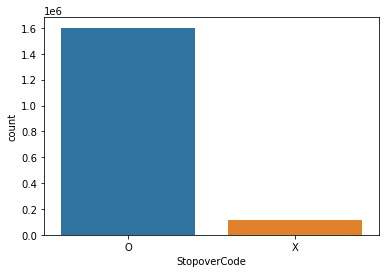

In [ ]:
sns.countplot(x="StopoverCode", data=original_df)
original_df['StopoverCode'].value_counts()

In [ ]:
original_df['StopoverCode'].isna().sum()

1720454

They are almost equal! This could be useful. Maybe a binary feature could be beneficial.

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='cluster', ylabel='BaseFareAmt'>

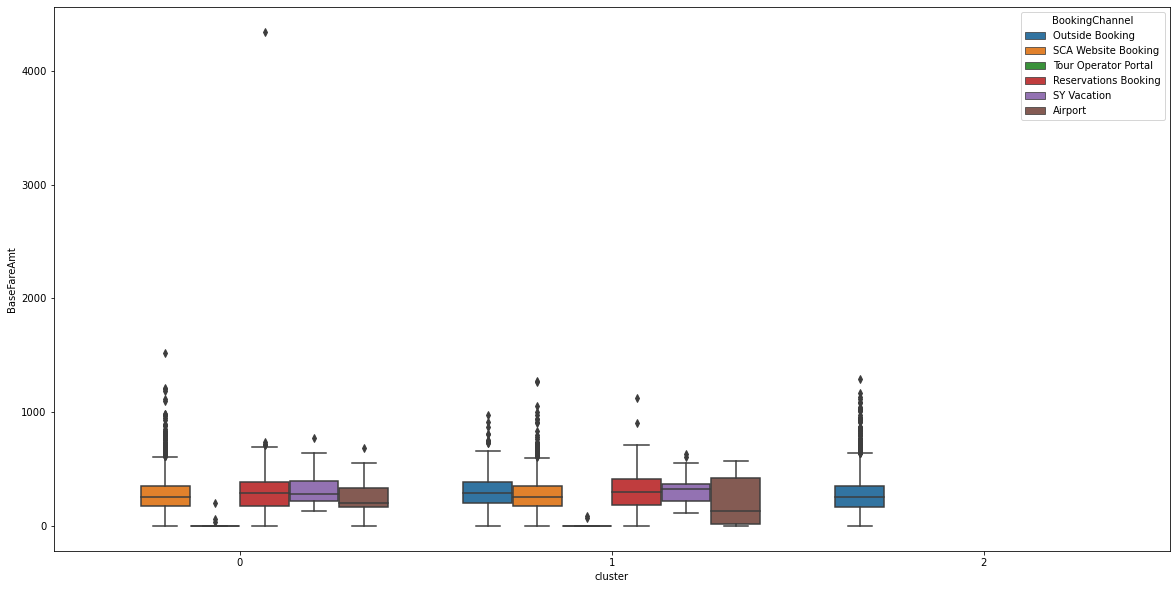

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="cluster", y="BaseFareAmt", data=top5_df_untouched, hue = 'BookingChannel')

<AxesSubplot:xlabel='cluster', ylabel='BaseFareAmt'>

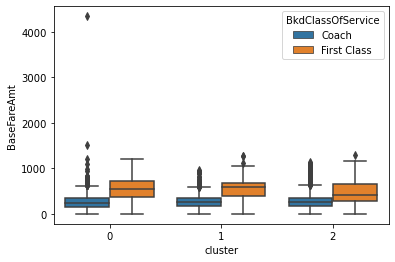

In [ ]:
sns.boxplot(x="cluster", y="BaseFareAmt", data=top5_df_untouched, hue = 'BkdClassOfService')

<Figure size 576x576 with 0 Axes>

<AxesSubplot:xlabel='cluster', ylabel='BaseFareAmt'>

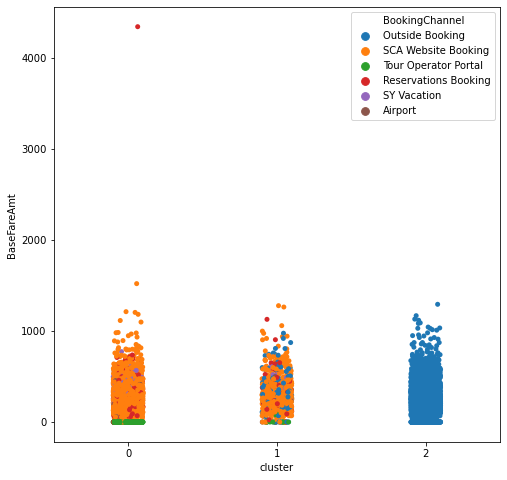

In [ ]:
plt.figure(figsize=(8,8))
sns.stripplot(x="cluster", y="BaseFareAmt", data=top5_df_untouched, hue="BookingChannel")

In [ ]:
# You can obtain the directions of these EigenVectors from sklearn by accessing the components_ attribute of the PCA object
print (pca.components_)

[[ 2.94287199e-01  6.87617807e-01  6.47532764e-01 -4.10112100e-03
   2.20604737e-02 -7.80955142e-04 -3.31255332e-02  2.56700365e-02
   3.85921049e-02  6.31897741e-03 -3.66746304e-02  4.85776070e-04
  -9.00847163e-02  8.95989402e-02]
 [-9.11438981e-01  3.45540899e-02  3.95912938e-01  3.40749819e-03
   9.60283838e-04 -4.47506852e-04  5.99667096e-02  4.10803242e-03
  -4.12017905e-02  2.02493087e-03 -2.44503755e-02 -1.89203214e-04
   5.21175109e-02 -5.19283077e-02]
 [ 2.60059334e-01 -7.09126936e-01  6.44886006e-01  1.61432737e-02
   3.14830698e-02  3.53617708e-04  2.50358472e-02 -2.43402167e-02
   5.15949954e-02  7.07574543e-05 -5.27150010e-02 -8.09387695e-04
   5.38701702e-02 -5.30607825e-02]]


In [ ]:
print (pca.components_.shape)

(3, 14)


In [ ]:
top5_df_loadings = top5_df.drop("cluster", axis=1)

In [ ]:
# check the loadings and generate a loading_df

loadings = pca_7_clusters.components_
loading_df = pd.DataFrame(loadings,columns=top5_df_loadings.columns).T
# rename the PC
loading_df.columns=['PC_'+str(c+1) for c in loading_df.columns]
# give the index a name as 'feature'
loading_df.index.name = 'feature'

In [ ]:
# Check the loadings, the contribution of features to each Principal Component
loading_df

,PC_1,PC_2,PC_3,PC_4
feature,,,,
Age,0.294287,-0.911439,0.260059,-0.111448
TicketNum,0.687618,0.034554,-0.709127,-0.069353
BaseFareAmt,0.647533,0.395913,0.644886,-0.017776
GenderCode_M,-0.004101,0.003407,0.016143,-0.003424
BkdClassOfService_First Class,0.022060,0.000960,0.031483,0.019782
BookingChannel_Airport,-0.000781,-0.000448,0.000354,0.000343
BookingChannel_Outside Booking,-0.033126,0.059967,0.025036,-0.657094
BookingChannel_Reservations Booking,0.025670,0.004108,-0.024340,0.000685
BookingChannel_SCA Website Booking,0.038592,-0.041202,0.051595,0.653681


The 3 Cluster Analysis results have been chosen and reported

## Let's Do similar Analysis for 7 clusters

Not using this for recommendations as it is hard to interpret. 

## Booking Channel Analysis For 7 Clusters

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='clusters_7', ylabel='Age'>

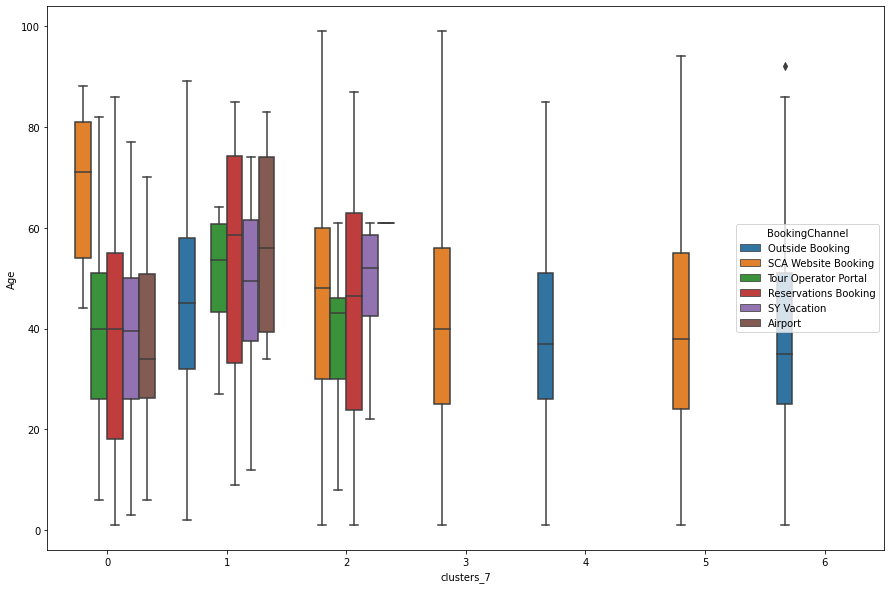

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="clusters_7", y="Age", data=top5_df_untouched, hue="BookingChannel")

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='clusters_7', ylabel='Age'>

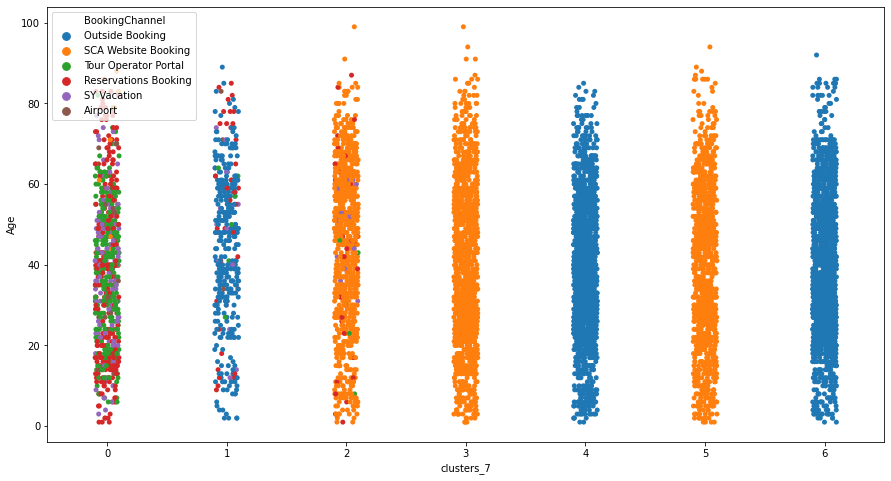

In [ ]:
plt.figure(figsize=(15, 8))
sns.stripplot(x="clusters_7", y="Age", data=top5_df_untouched, hue="BookingChannel")

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='clusters_7', ylabel='Age'>

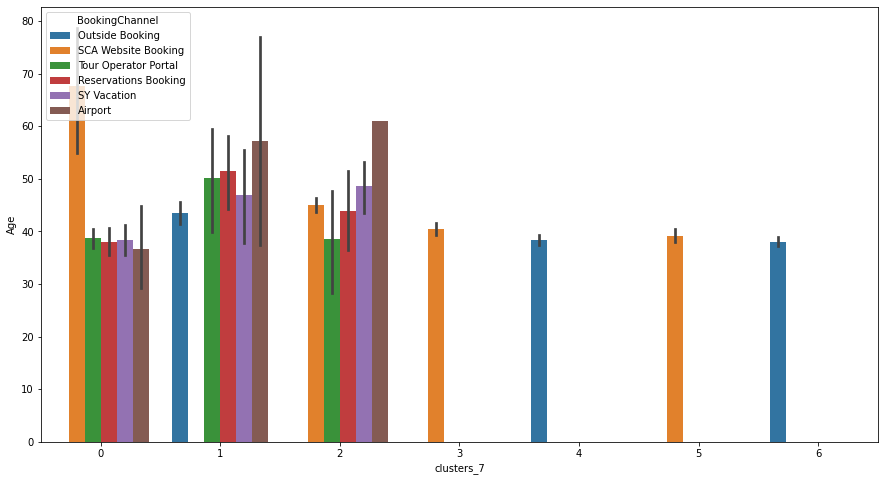

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x="clusters_7", y="Age", data=top5_df_untouched, hue="BookingChannel")

## Gender Code Analysis For Seven Clusters

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='clusters_7', ylabel='Age'>

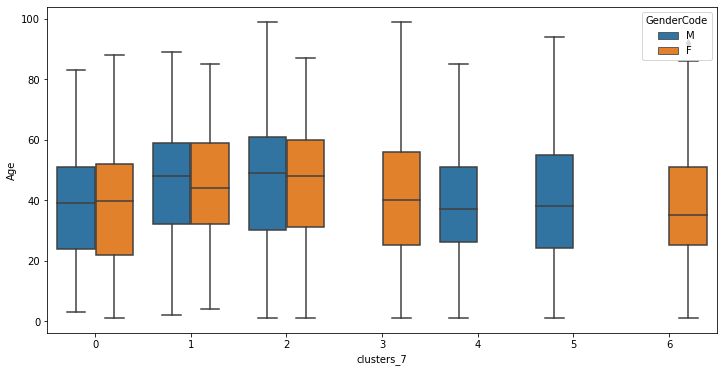

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="clusters_7", y="Age", data=top5_df_untouched, hue="GenderCode")

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='clusters_7', ylabel='Age'>

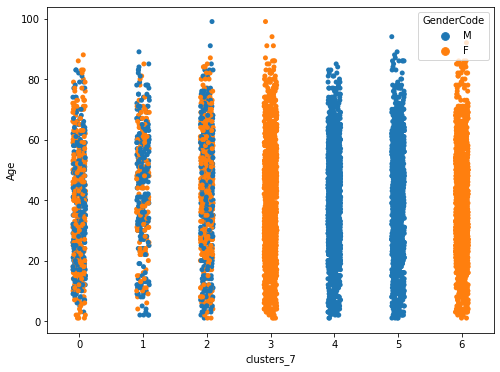

In [ ]:
plt.figure(figsize=(8, 6))
sns.stripplot(x="clusters_7", y="Age", data=top5_df_untouched, hue="GenderCode")

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='clusters_7', ylabel='Age'>

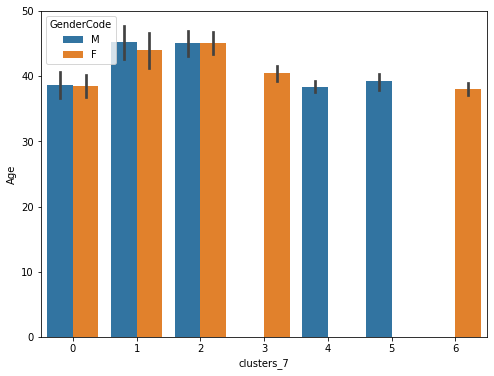

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x="clusters_7", y="Age", data=top5_df_untouched, hue="GenderCode")

## Booked Class Analysis For Seven Clusters


<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='clusters_7', ylabel='Age'>

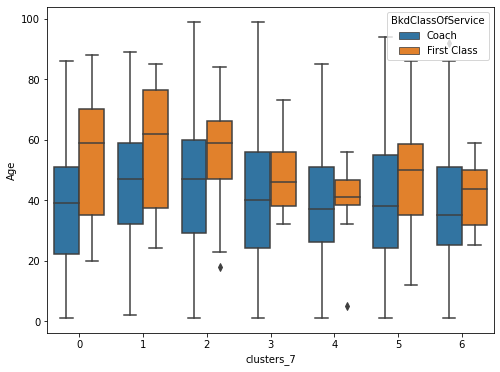

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="clusters_7", y="Age", data=top5_df_untouched, hue="BkdClassOfService")

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='clusters_7', ylabel='BaseFareAmt'>

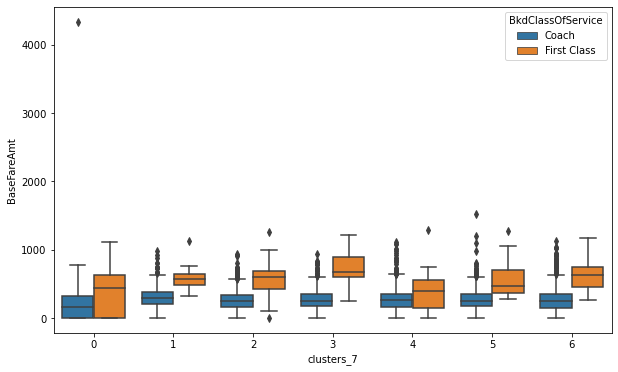

In [ ]:
# Comes in Base FAre AMNTTTTTTT
plt.figure(figsize=(10,6))
sns.boxplot(x="clusters_7", y="BaseFareAmt", data=top5_df_untouched, hue="BkdClassOfService")

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='clusters_7', ylabel='Age'>

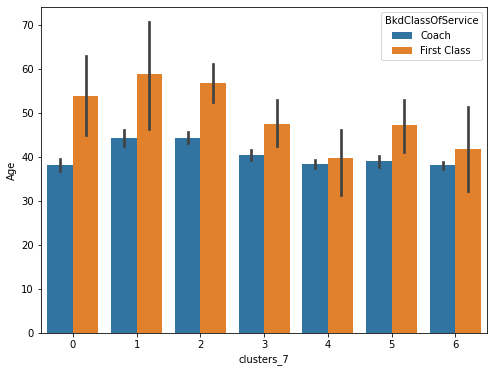

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x="clusters_7", y="Age", data=top5_df_untouched, hue="BkdClassOfService")

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='clusters_7', ylabel='Age'>

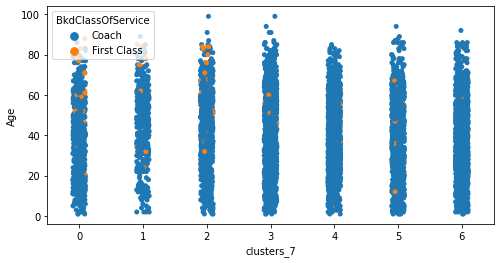

In [ ]:
plt.figure(figsize=(8, 4))
sns.stripplot(x="clusters_7", y="Age", data=top5_df_untouched, hue="BkdClassOfService")

## UflyMemberStatus Analysis for Seven Clusters

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='clusters_7', ylabel='Age'>

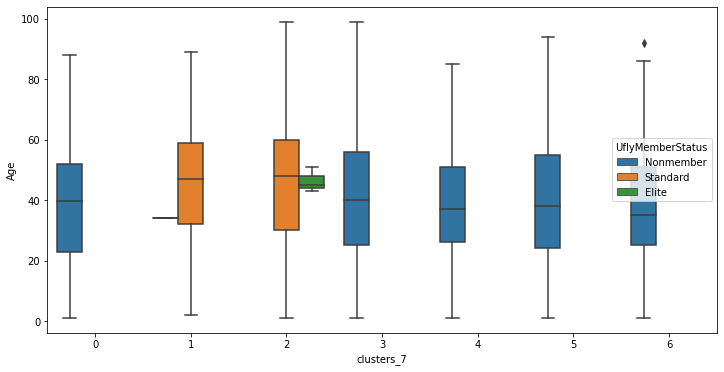

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="clusters_7", y="Age", data=top5_df_untouched, hue="UflyMemberStatus")

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='UflyMemberStatus', ylabel='count'>

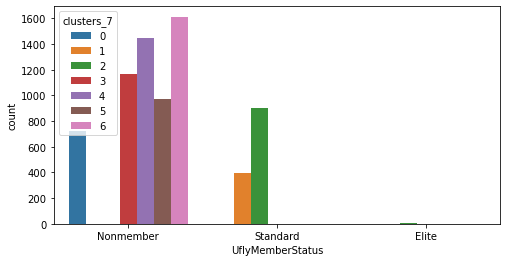

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x="UflyMemberStatus", data=top5_df_untouched, hue="clusters_7")

<Figure size 576x288 with 0 Axes>

<AxesSubplot:xlabel='clusters_7', ylabel='Age'>

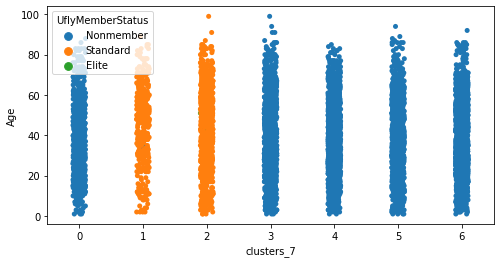

In [ ]:
plt.figure(figsize=(8, 4))
sns.stripplot(x="clusters_7", y="Age", data=top5_df_untouched, hue="UflyMemberStatus")

## BaseFareAmt Analysis For Seven Clusters

<Figure size 288x288 with 0 Axes>

<AxesSubplot:xlabel='clusters_7', ylabel='BaseFareAmt'>

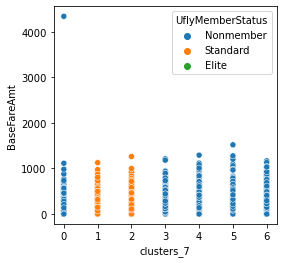

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x="clusters_7", y="BaseFareAmt", data=top5_df_untouched, hue = 'UflyMemberStatus')

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='clusters_7', ylabel='BaseFareAmt'>

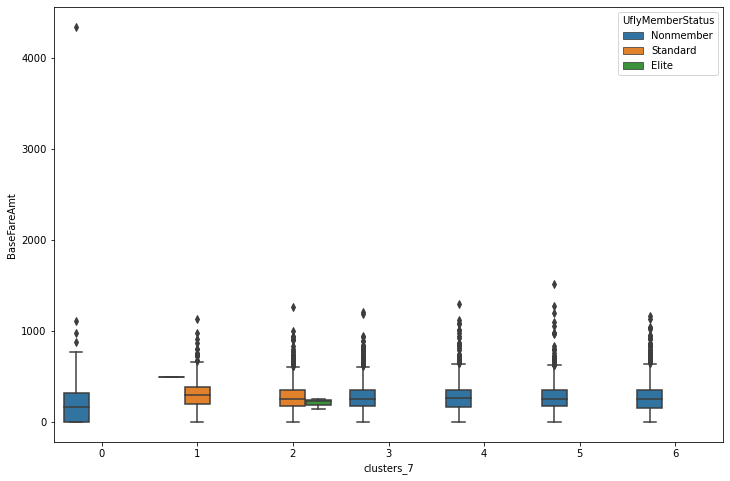

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="clusters_7", y="BaseFareAmt", data=top5_df_untouched, hue = 'UflyMemberStatus')

<Figure size 1152x720 with 0 Axes>

<AxesSubplot:xlabel='clusters_7', ylabel='BaseFareAmt'>

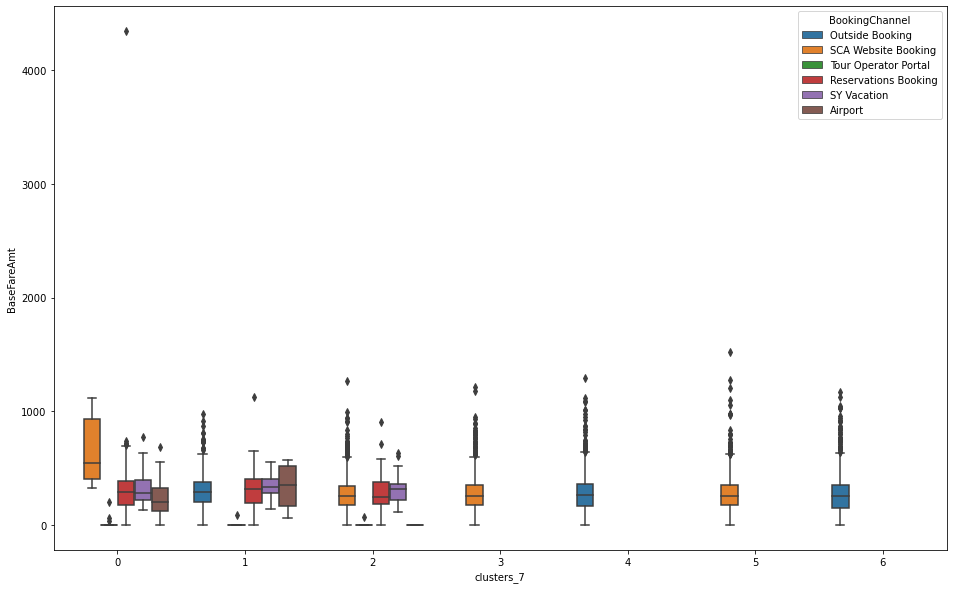

In [ ]:
plt.figure(figsize=(16, 10))
sns.boxplot(x="clusters_7", y="BaseFareAmt", data=top5_df_untouched, hue = 'BookingChannel')

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='clusters_7', ylabel='BaseFareAmt'>

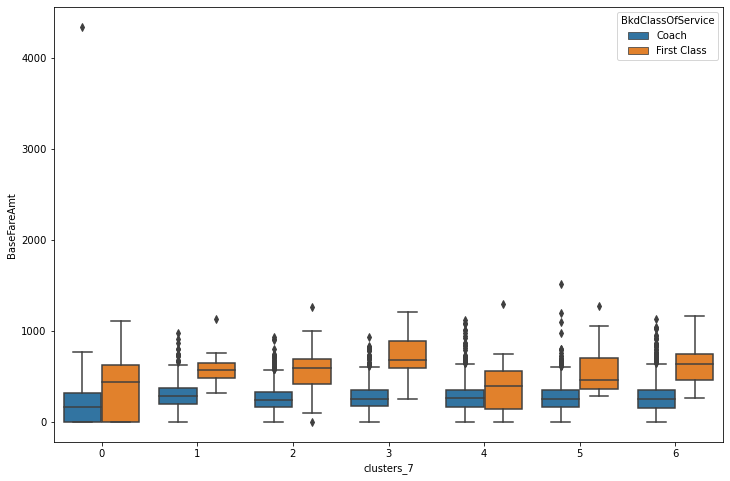

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="clusters_7", y="BaseFareAmt", data=top5_df_untouched, hue = 'BkdClassOfService')

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='clusters_7', ylabel='BaseFareAmt'>

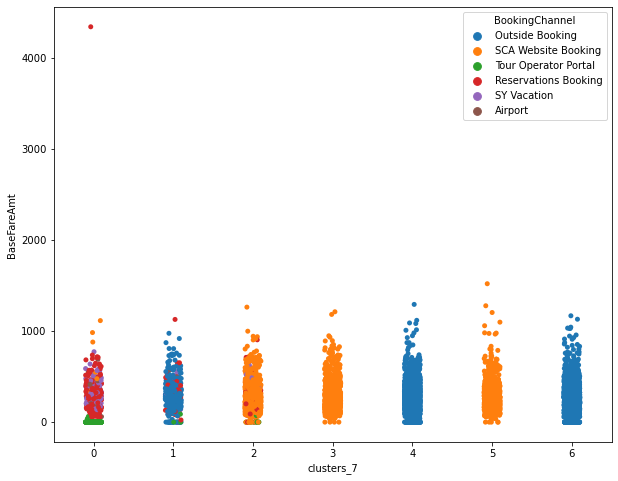

In [ ]:
plt.figure(figsize=(10,8))
sns.stripplot(x="clusters_7", y="BaseFareAmt", data=top5_df_untouched, hue="BookingChannel")

The 3 Cluster Analysis results have been chosen and reported